In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import vessel_voxelizer as vv

In [2]:
# read the vessel data
vessel_positions, vessel_radii = vv.load_vessels(os.path.abspath("../files/example_vessels.csv"))

In [3]:
# define the voxel grid
volume_spacing = 0.01
volume_bounds = np.array([[-0.1, 4.4], [-0.1, 3.9], [-0.1, 1.54]], dtype=np.float32)
volume_shape = np.round((volume_bounds[:, 1] - volume_bounds[:, 0]) / volume_spacing).astype(int)
volume_start = np.array(volume_bounds[:, 0], dtype=np.float32)

In [4]:
# run voxelization
volume = vv.voxelize(volume_shape, volume_start, volume_spacing, vessel_positions, vessel_radii)

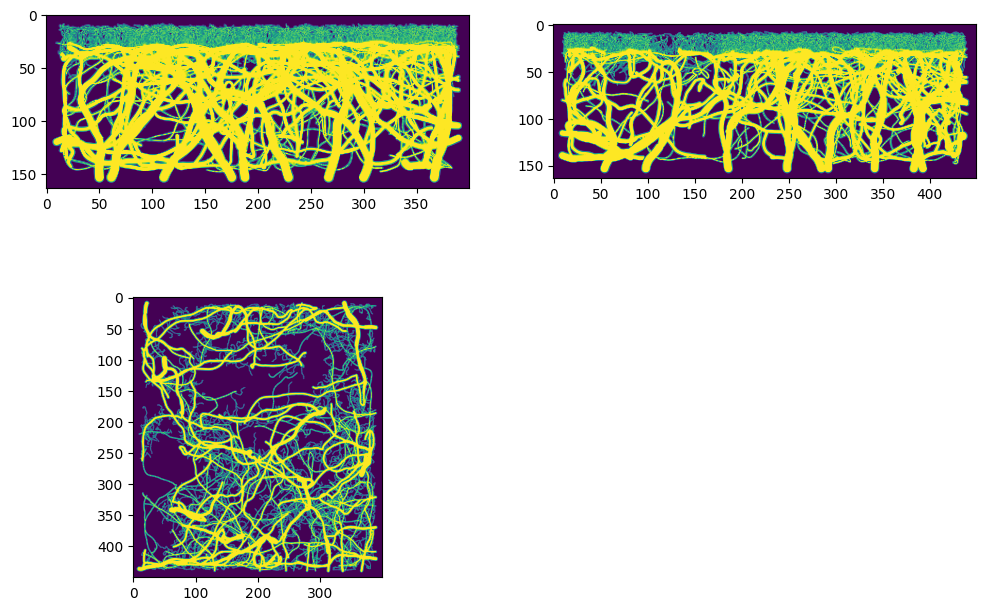

In [5]:
# plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
axs[0].imshow(np.rot90(volume.max(0), 1))
axs[1].imshow(np.rot90(volume.max(1), 1))
axs[2].imshow(volume.max(2))
axs[3].axis('off')
plt.show()